<a href="https://colab.research.google.com/github/Mr-Himanshu123/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Description :-**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

##**Github link :-** https://github.com/Mr-Himanshu123/Fraud-Detection.git

In [41]:
#Importing libraries
import pandas as pd
import numpy as np

#Visualizing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#Mounting a drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# data loading
df = pd.read_csv('/content/drive/MyDrive/Insance project/Fraud.csv.crdownload')

In [44]:
#First look
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [45]:
#checking the shape of the dataset
df.shape

(1162838, 11)

In [46]:
#Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162838 entries, 0 to 1162837
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1162838 non-null  int64  
 1   type            1162838 non-null  object 
 2   amount          1162838 non-null  float64
 3   nameOrig        1162838 non-null  object 
 4   oldbalanceOrg   1162838 non-null  float64
 5   newbalanceOrig  1162838 non-null  float64
 6   nameDest        1162838 non-null  object 
 7   oldbalanceDest  1162837 non-null  float64
 8   newbalanceDest  1162837 non-null  float64
 9   isFraud         1162837 non-null  float64
 10  isFlaggedFraud  1162837 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 97.6+ MB


In [47]:
#describing dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.162838e+06,1.162838e+06,1.162838e+06,1.162838e+06,1.162837e+06,1.162837e+06,1.162837e+06,1162837.0
mean,3.668631e+01,1.611836e+05,8.755064e+05,8.954689e+05,9.801959e+05,1.114377e+06,1.296828e-03,0.0
std,3.313068e+01,2.744899e+05,2.968094e+06,3.004531e+06,2.301161e+06,2.418130e+06,3.598816e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.226418e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.300000e+01,7.641833e+04,1.585900e+04,0.000000e+00,1.249896e+05,2.169823e+05,0.000000e+00,0.0
75%,4.200000e+01,2.154774e+05,1.334095e+05,1.720635e+05,9.193272e+05,1.149745e+06,0.000000e+00,0.0
max,1.320000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,0.0


In [48]:
#checking duplicate value
df.duplicated().sum()

0

In [49]:
#Checking null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [50]:
#Checking uniques of each variable
df.nunique()

step                  132
type                    5
amount            1115524
nameOrig          1162523
oldbalanceOrg      451619
newbalanceOrig     515911
nameDest           500417
oldbalanceDest     667490
newbalanceDest     507294
isFraud                 2
isFlaggedFraud          1
dtype: int64

In [51]:
#Checking values counts of important variable
print('type _________________')
print(df['type'].value_counts())
print('\n')

print('isFraud _______________')
print(df['isFraud'].value_counts())
print('\n')

print('isFlaggedFraud___________')
print(df['isFlaggedFraud'].value_counts())

type _________________
CASH_OUT    411302
PAYMENT     394584
CASH_IN     252523
TRANSFER     96377
DEBIT         8052
Name: type, dtype: int64


isFraud _______________
0.0    1161329
1.0       1508
Name: isFraud, dtype: int64


isFlaggedFraud___________
0.0    1162837
Name: isFlaggedFraud, dtype: int64


### **Insights we found from the above analysis : -**
1. Based on the provided data, it can be observed that there are 1,162,838 rows and 11 columns.
2. No duplicate values are present in the dataset.
3. The columns 'oldbalanceDest,' 'newbalanceDest,' 'isFraud,' and 'isFlaggedFraud' each contain only one missing value. As a result, we can safely drop these columns in the further analysis.
4.The 'isFlaggedFraud' column contains only a single type of data, indicating that it has no variability. Therefore, it is unnecessary for our analysis, and we can safely exclude this column.
5. The 'amount' column exhibits a spread with respect to the mean, suggesting the presence of outliers in that variable.

##**Data Visualization**

<Axes: >

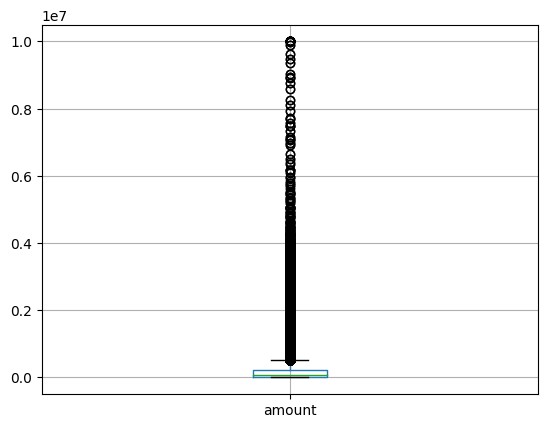

In [52]:
#boxplot
df.boxplot(column=['amount'])

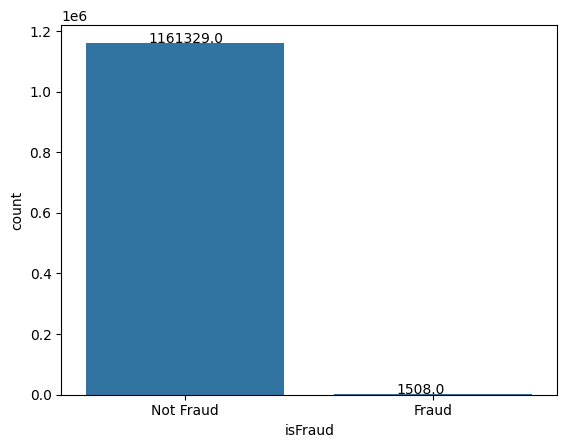

In [53]:
#target variable count plot
df['isFraud'] = df['isFraud'].map({0: 'Not Fraud', 1: 'Fraud'})

ax = sns.countplot(x="isFraud", data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

plt.show()

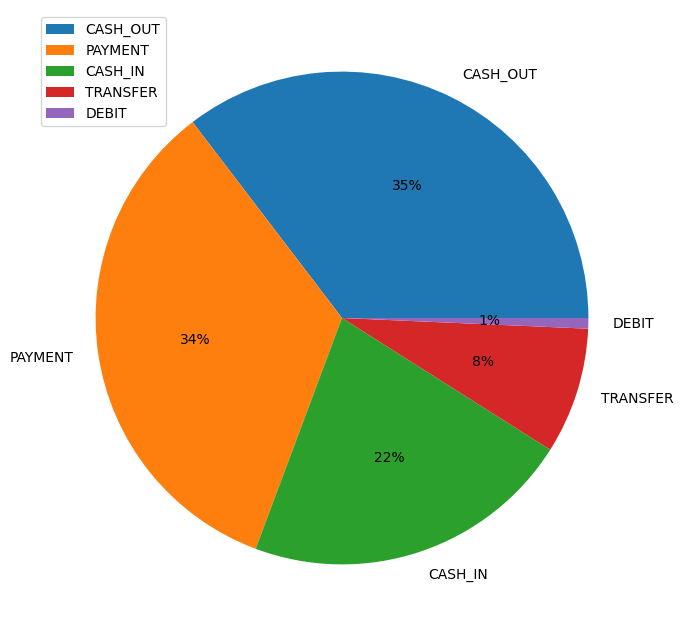

In [54]:
#types of transection
type = df['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

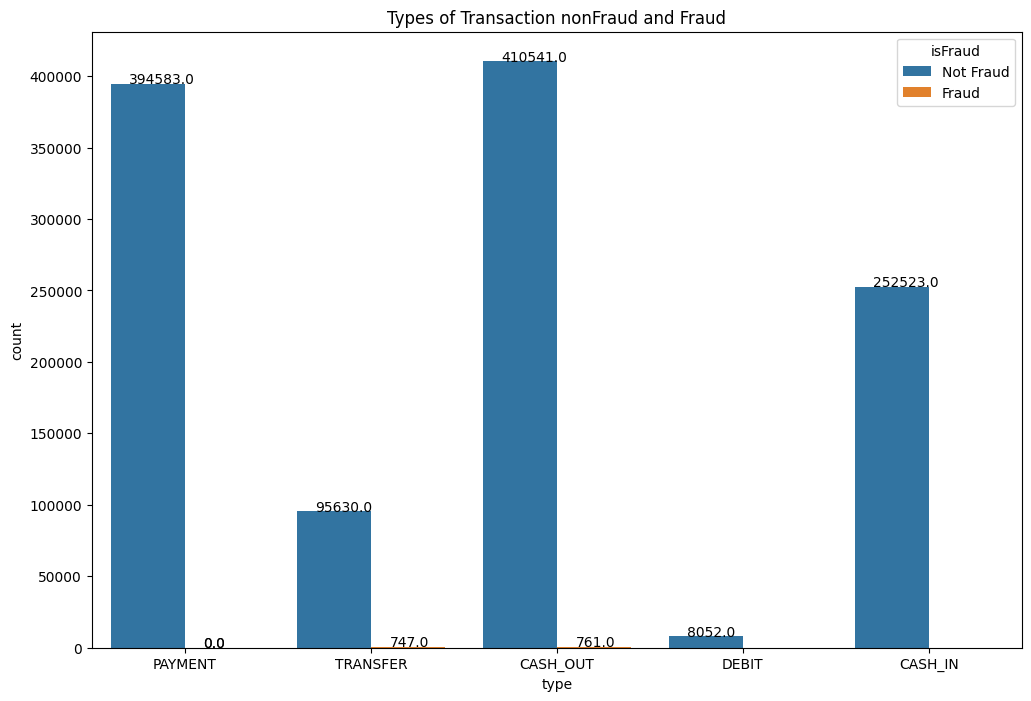

In [55]:
# Count of Fraud and Non-Fraud Transactions in each type of Transaction
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = df)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<ipython-input-56-71e703845f3f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="husl")
<ipython-input-56-71e703845f3f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df, palette= 'husl')
<ipython-input-56-71e703845f3f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = df,palette="bright")


Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

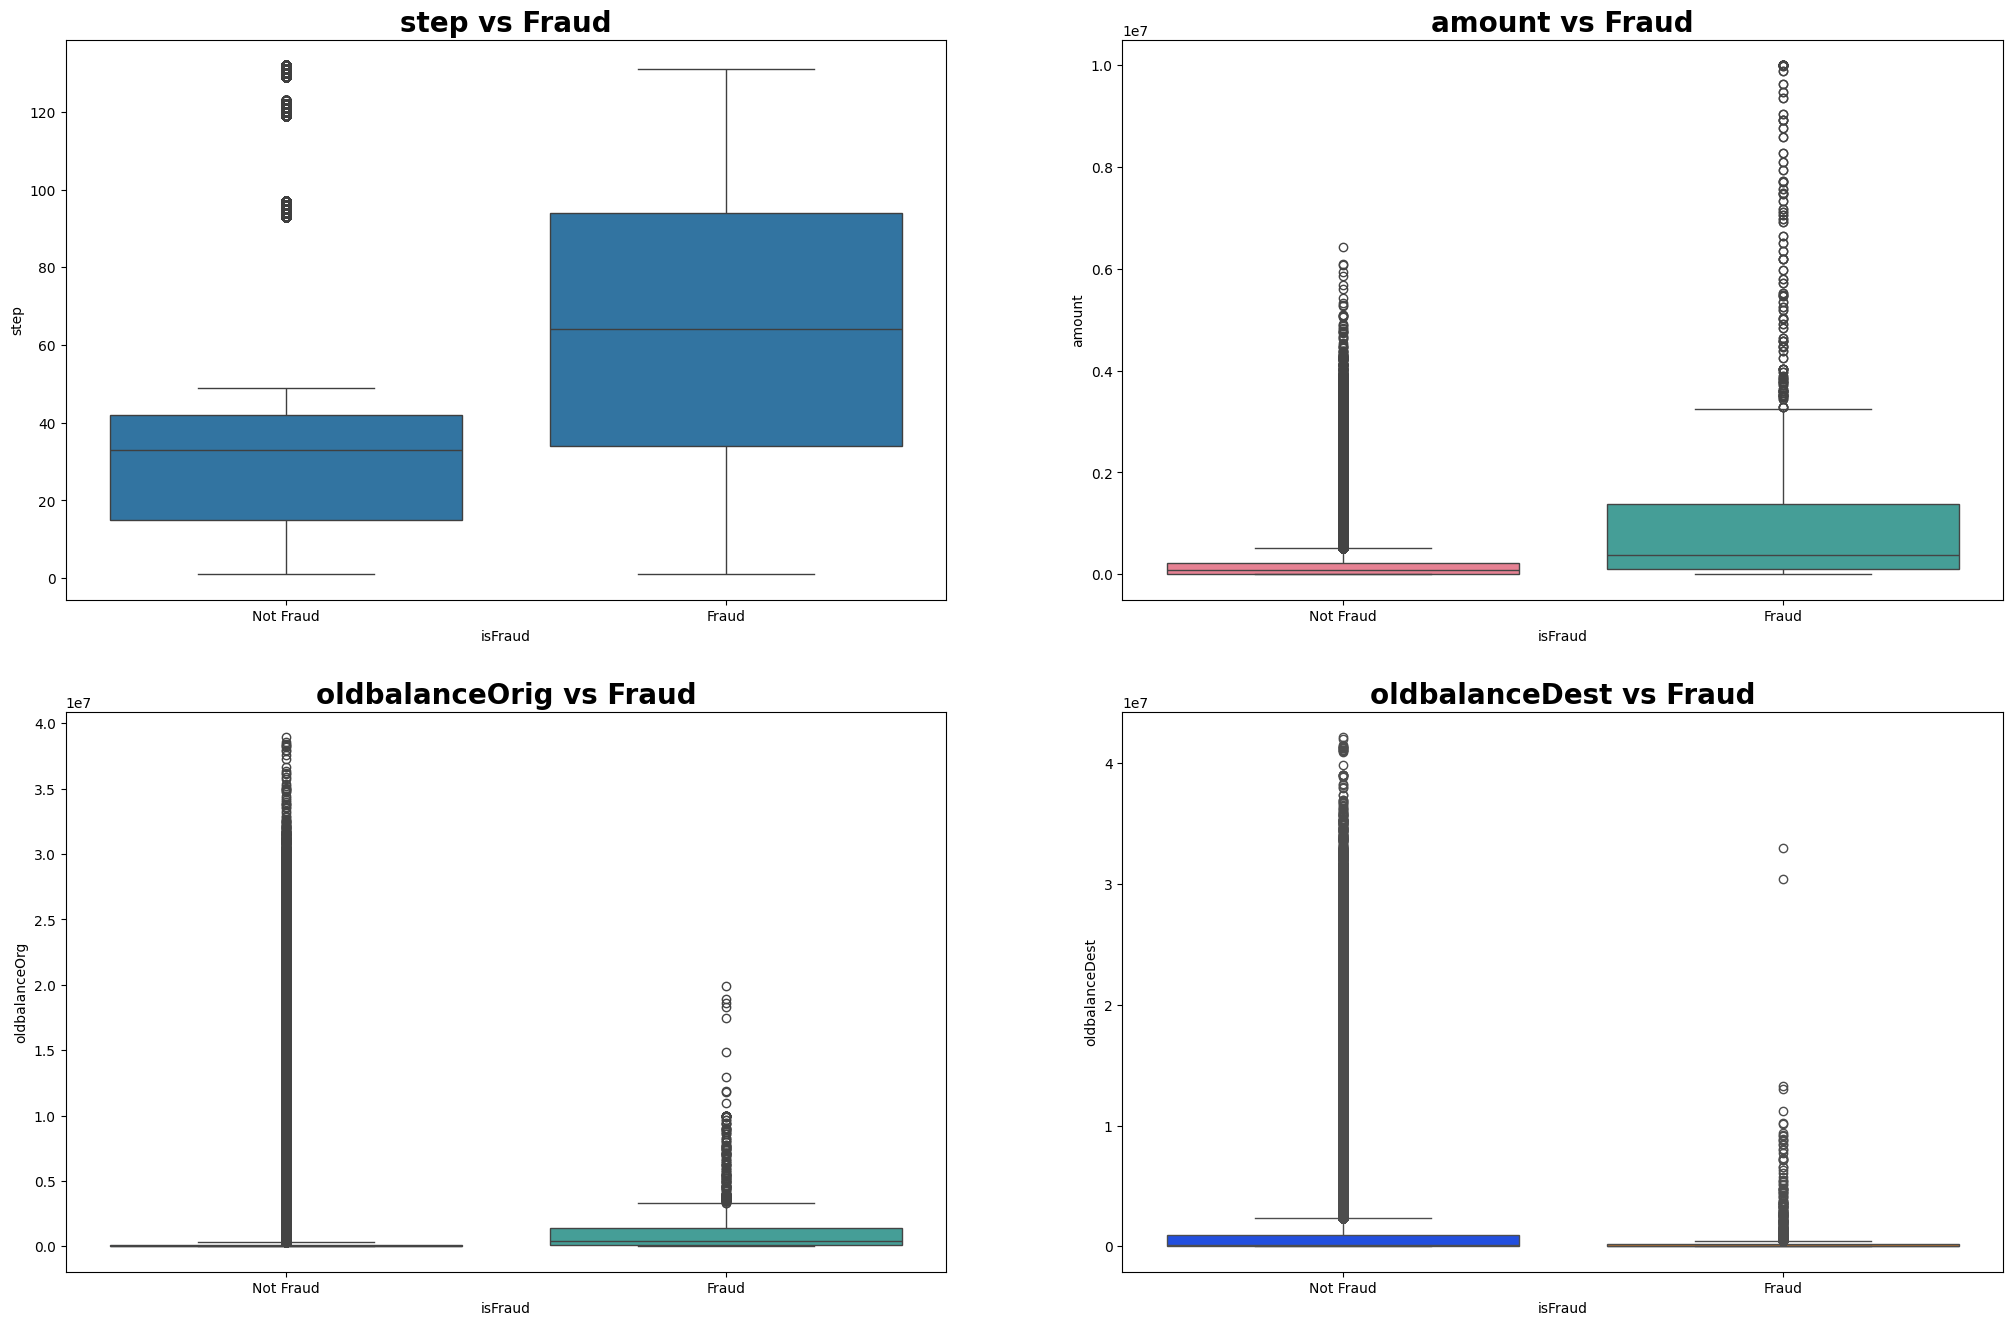

In [56]:
#Visualizing Numeric variables against Fraud using Boxplots.
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = df)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = df,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

<ipython-input-57-b354ae3d2e12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coorelation=df.corr()


<Axes: >

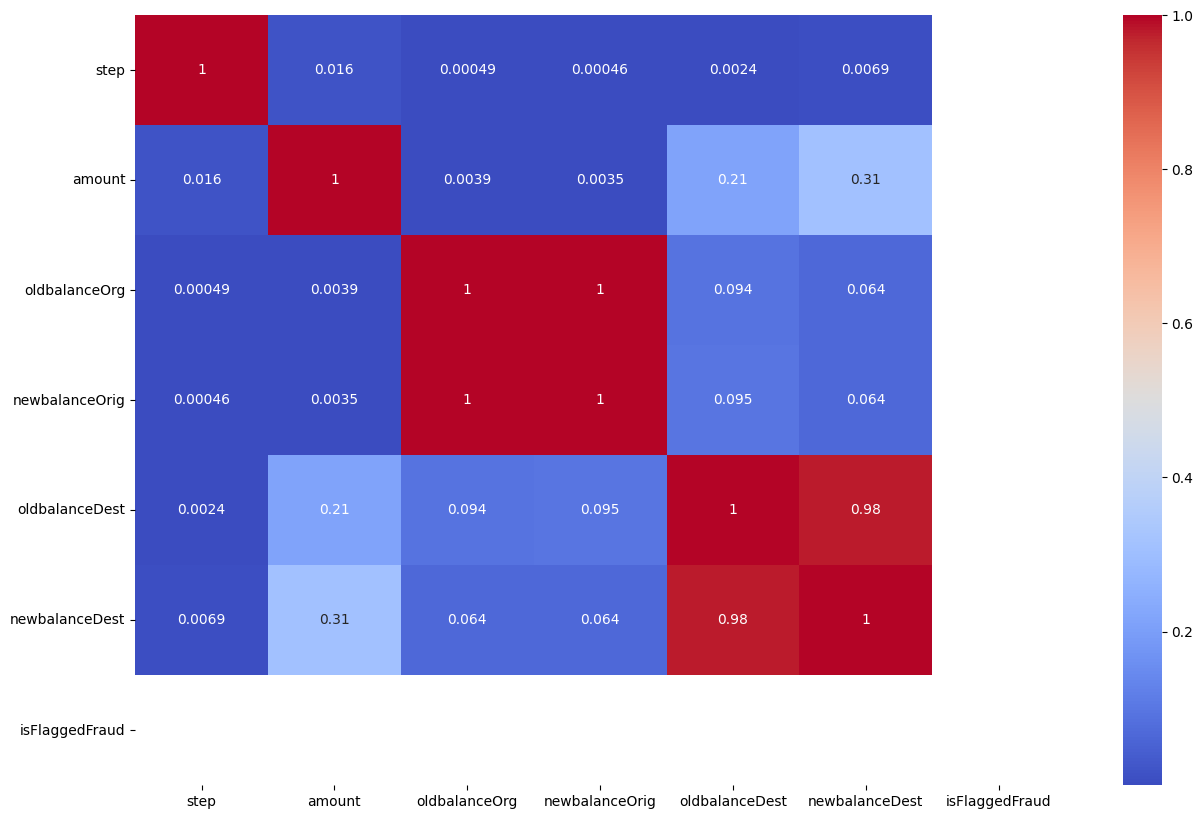

In [57]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
coorelation=df.corr()
sns.heatmap(abs(coorelation), annot=True, cmap='coolwarm')

##**Insights from the Visualization :-**
1. The target variable 'isFraud' exhibits class imbalance.
2. Transaction types TRANSFER and CASH_OUT only have FRAUD Transactions.
3. DEBIT Transactions are only few and TRANSFER type Transactions are also less compared to other type of transactions.
4. No of Fraud transactions of TRANSFER type are very close to No of CASH_OUT FRAUD transactions. Probably modus operadi of FRAUD transactions is by transferring funds to a specific account and then CASHING OUT from those accounts. We will check this further.
5. Median amount for fraud transactions is greater than Non Fraud transactions.
6. Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.
7. From the headmap visualization, we can say that the variables
 * oldbalanceOrg and newbalanceOrg is 100% correlated
 * oldbalanceDest and newbalanceDest is 98% correlated

## **Feature Engineering and data pre-processing**

In [58]:
#creating a copy of original dataset
my_data = df.copy()

In [59]:
#Creating a column as per the transection
my_data["Type2"] = np.nan # initializing feature column

# filling feature column
my_data.loc[my_data.nameOrig.str.contains('C') & my_data.nameDest.str.contains('C'),"Type2"] = "CC"
my_data.loc[my_data.nameOrig.str.contains('C') & my_data.nameDest.str.contains('M'),"Type2"] = "CM"
my_data.loc[my_data.nameOrig.str.contains('M') & my_data.nameDest.str.contains('C'),"Type2"] = "MC"
my_data.loc[my_data.nameOrig.str.contains('M') & my_data.nameDest.str.contains('M'),"Type2"] = "MM"

We derive a new feature Transaction Type2 from these features account types "C" (customer) and "M" (merchant), which would be the first character for each value under nameOrig and nameDest.

We will create a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [60]:
my_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Not Fraud,0.0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Not Fraud,0.0,CM
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0.0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0.0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Not Fraud,0.0,CM


### 1. Handling missing values

In [61]:
#missing values counts
my_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
Type2             0
dtype: int64

In [62]:
#Droping and checking null values
my_data.dropna(inplace = True)
my_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
Type2             0
dtype: int64

###2. Feature Selection

In [63]:
# Dropping columns which are highly correlated - multicollinearity
## Also Dropping unnecessary columns which are not providing meaning insights
my_data = my_data.drop(['oldbalanceOrg', 'oldbalanceDest','nameOrig','nameDest', 'isFlaggedFraud'], 1)

<ipython-input-63-a96b779de493>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  my_data = my_data.drop(['oldbalanceOrg', 'oldbalanceDest','nameOrig','nameDest', 'isFlaggedFraud'], 1)


In [64]:
my_data.tail()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,Type2
1162832,132,TRANSFER,758282.65,0.00,928236.79,Not Fraud,CC
1162833,132,CASH_OUT,418847.89,0.00,939602.46,Not Fraud,CC
1162834,132,PAYMENT,11995.01,354216.99,0.00,Not Fraud,CM
1162835,132,TRANSFER,552410.62,0.00,889494.82,Not Fraud,CC
1162836,132,TRANSFER,389665.84,0.00,2984671.87,Not Fraud,CC


###3. Categorical Encoding

In [65]:
# Creating dummies of type and Type2 column
my_data = pd.get_dummies(my_data, columns = ['type', 'Type2'])
my_data.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Type2_CC,Type2_CM
0,1,9839.64,160296.36,0.0,Not Fraud,0,0,0,1,0,0,1
1,1,1864.28,19384.72,0.0,Not Fraud,0,0,0,1,0,0,1
2,1,181.00,0.00,0.0,Fraud,0,0,0,0,1,1,0
3,1,181.00,0.00,0.0,Fraud,0,1,0,0,0,1,0
4,1,11668.14,29885.86,0.0,Not Fraud,0,0,0,1,0,0,1


In [66]:
#replacing value target variable with 0 and 1
my_data['isFraud'].replace(['Not Fraud', 'Fraud'], [0,1], inplace =True)
my_data.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Type2_CC,Type2_CM
0,1,9839.64,160296.36,0.0,0,0,0,0,1,0,0,1
1,1,1864.28,19384.72,0.0,0,0,0,0,1,0,0,1
2,1,181.00,0.00,0.0,1,0,0,0,0,1,1,0
3,1,181.00,0.00,0.0,1,0,1,0,0,0,1,0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,0,0,1


In [67]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [81]:
my_data.shape

(1162837, 12)

###4. Data Scaling

In [68]:
# Perform Scaling
scaler = StandardScaler()
my_data["NormalizedAmount"] = scaler.fit_transform(my_data["amount"].values.reshape(-1, 1))
my_data.drop(["amount"], inplace= True, axis= 1)

Y = my_data["isFraud"]
X = my_data.drop(["isFraud"], axis= 1)

###5. Handling Class Inbalance

In [69]:
# Handling Imbalanced Dataset (If needed)
# importing SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', Y.value_counts())
smt = SMOTE(random_state=40)

# fit predictor and target variable
X_smt, Y_smt = smt.fit_resample(X,Y)

print('\nDataset After:\n',Y_smt.value_counts())

Dataset Before:
 0    1161329
1       1508
Name: isFraud, dtype: int64

Dataset After:
 0    1161329
1    1161329
Name: isFraud, dtype: int64


###6. Train-Test Split Standardizing Data

In [70]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X_smt, Y_smt, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1625860, 11)
Shape of X_test:  (696798, 11)


## **Machine Learning Model Implementation**

In [71]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [72]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [73]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.46512475638563
Random Forest Score:  99.48909153011346


In [74]:
# key terms of Confusion Matrix - DT
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 347497
False Positives: 2444
True Negatives: 345574
False Negatives: 1283
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 347693
False Positives: 2473
True Negatives: 345545
False Negatives: 1087


TP(Decision Tree) ~ TP(Random Forest) so no competetion here.
FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge
TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
FN(Decision Tree) ~ FN(Random Forest)

Here Random Forest looks good.

In [75]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[345574   2444]
 [  1283 347497]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[345545   2473]
 [  1087 347693]]


In [76]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    348018
           1       0.99      1.00      0.99    348780

    accuracy                           0.99    696798
   macro avg       0.99      0.99      0.99    696798
weighted avg       0.99      0.99      0.99    696798

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    348018
           1       0.99      1.00      0.99    348780

    accuracy                           0.99    696798
   macro avg       0.99      0.99      0.99    696798
weighted avg       0.99      0.99      0.99    696798



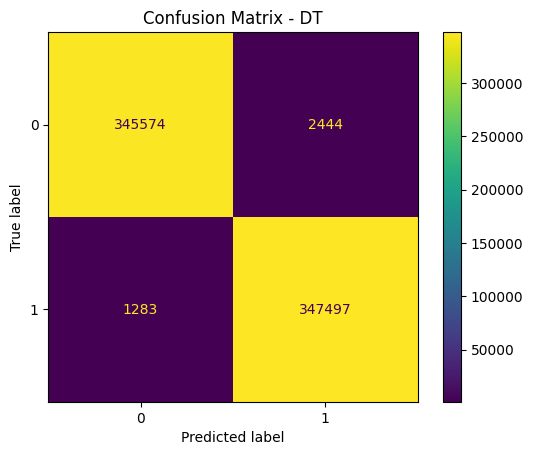

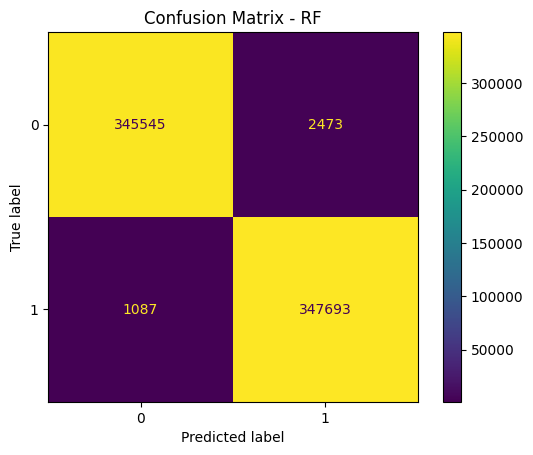

In [77]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

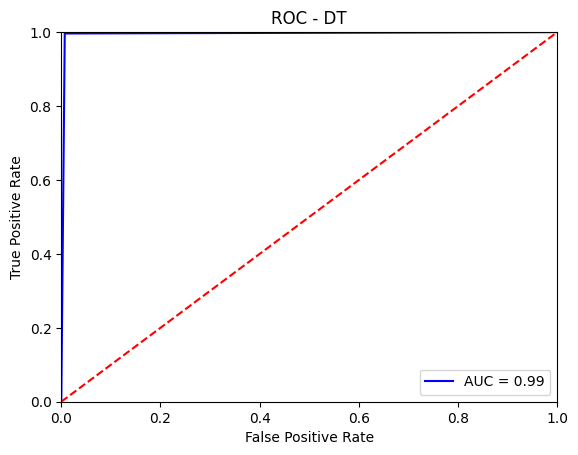

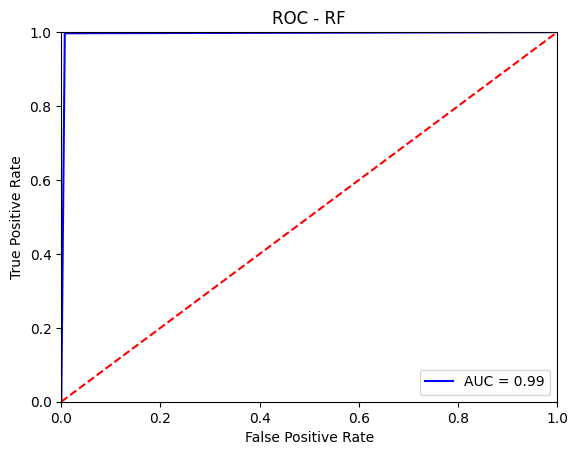

In [78]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

##**Conclusion**

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?

1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?

1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
3. Always keep a log of your payments.